
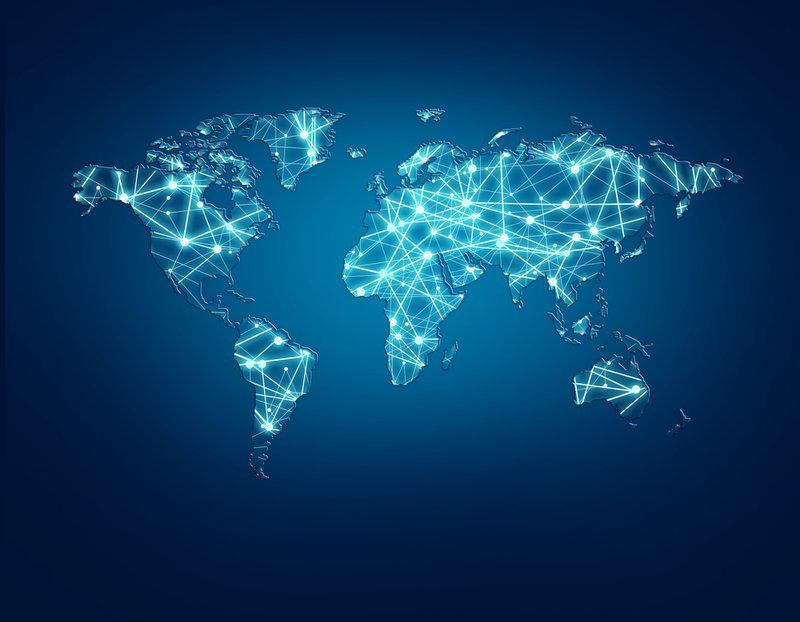


# Mental Health Acquisition 

**Author:** Carlos McCrum
***

## Overview

The goal is to find contributing factors to mental health worldwide and make predictions on these features to see where the World Health Organization can divert reasorces to assist in the mental health of people worldwide. This project will primarily be focusing on North and South America as there are many contries with the contributing factors varying in complexity accross different cultures so utilizing a more focused approch will produce more accurate results to the countries in question. The data comes from multipule sorces.  Methods include combining datasets, preprocessing, testing significant features and predictive modeling. Results show some the significant features that affect suicide rates are multilateral debt, access to clean water and electricity, education and freedom to make life choices. Recommendations would vary from country to country but ovarall recommendation is Universal Mental Health care, better adequacy of social safety net programs to those experiencing hardship. 


## Business Problem

Finding the contributing factors to suicide rates by country using, happiness scores, world development indicators and suicide rates from three different datasets. There is a vast amount of data contained in these datasets so the challange is going to be narrowing down which features to work with. 



***

## Data Understanding

Multipule sorces of data, the first being from the World Bank containing over a thousand indicators of economic development worldwide. The second comes from the Gallup World Poll containing the World Happiness Report and is a survey of the state of global happiness. The last is a dataset contains the suicide rates by country referecned from United Nations Development Program, World Health Organization, and the World Bank. The two target variables are 'Life Ladder' (happiness score) from the World Happiness Report and 'suicides/100k pop' from the Suicide Rates dataset. The world development dataset is only being used as a reference to find contributing features to either suicide rates or happiness scores becuase it has over a thousand indicators by year. 

***

* Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean
import numpy as np
from datetime import datetime
from datetime import timedelta
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, plot, iplot
import sqlite3
import Code.Preparation as prep
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')

Load datasets

In [2]:
RateDf = pd.read_csv(prep.path('sucide.csv'))
RateDf = RateDf.rename(columns={'country': 'Country'}) 

HappyDf = pd.read_csv('Data/CleanedHappy.csv')

WorldDf = pd.read_csv('Data/WorldDf.csv')

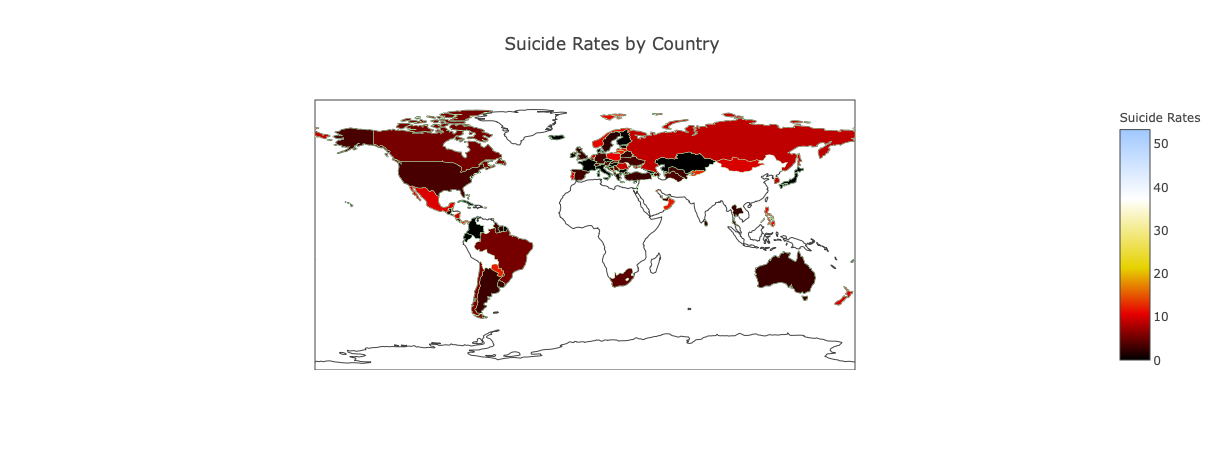

In [3]:
prep.plot_map(RateDf, 'suicides/100k pop', 'Suicide Rates by Country', 'Suicide Rates')

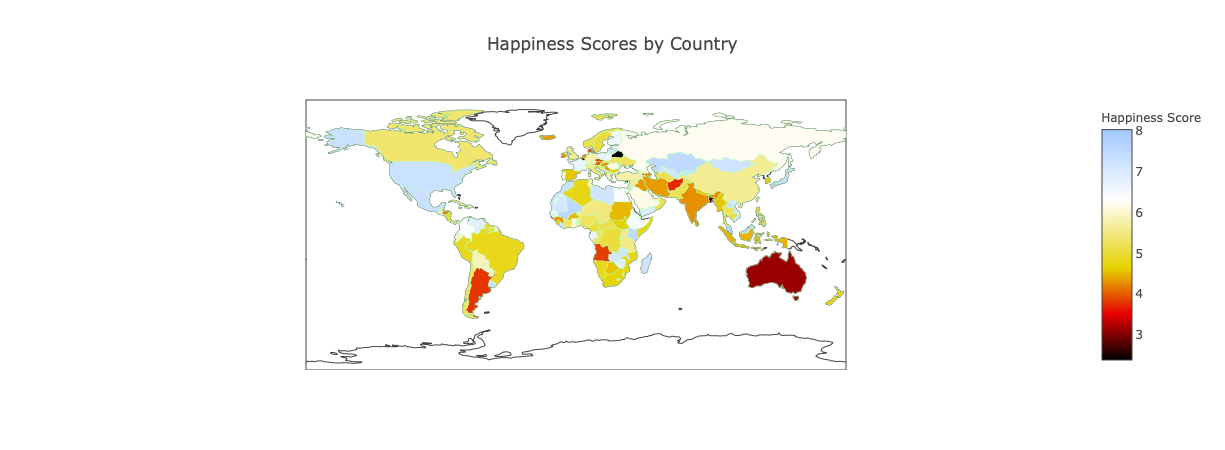

In [4]:
prep.plot_map(HappyDf, 'Life Ladder', 'Happiness Scores by Country', 'Happiness Score')

### Worldwide EDA

We can see that happiness rates hit a low around 2006 worldwide and has since been trending upwards untill the year 2020 where we see a sharp decline.

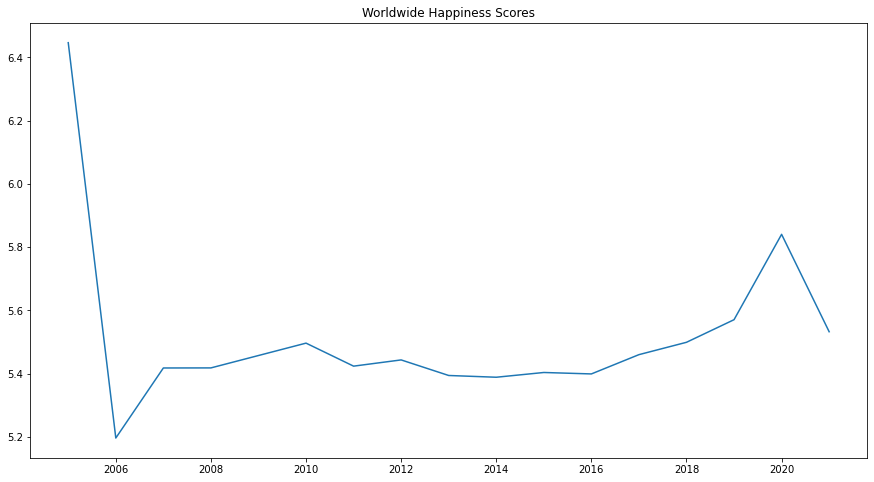

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(HappyDf.groupby('year').mean()['Life Ladder'])
plt.title('Worldwide Happiness Scores');

For suicide rates we have a longer timeframe from 1985 to 2016. We see that since the peak in the mid 1990s we have been trending downwards until around 2015 where we see a exponential sharp increase into missing data.

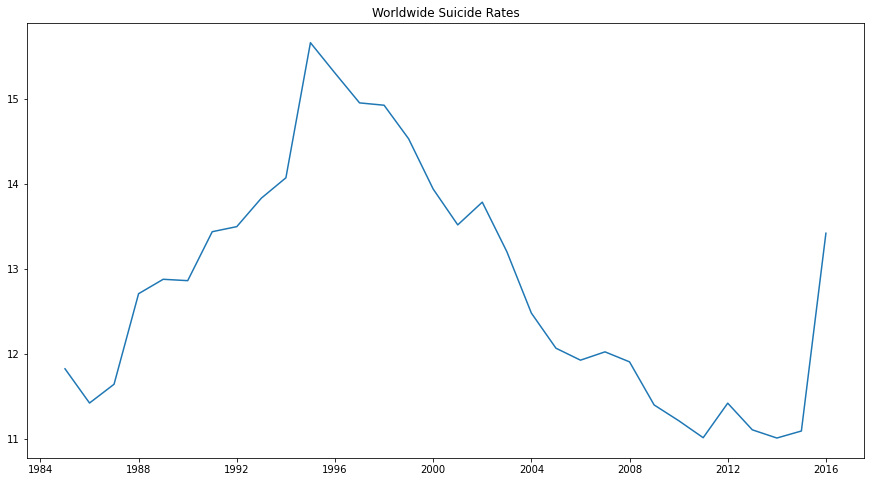

In [71]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(RateDf.groupby('year').mean()['suicides/100k pop'])
plt.title('Worldwide Suicide Rates');

### North and South America

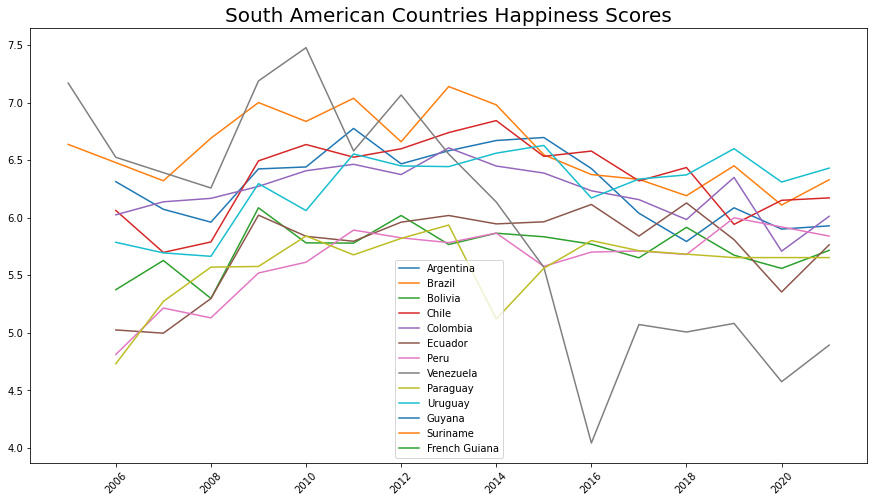

In [7]:
prep.plot_happy_S(HappyDf)
plt.title('South American Countries Happiness Scores', fontsize=20);

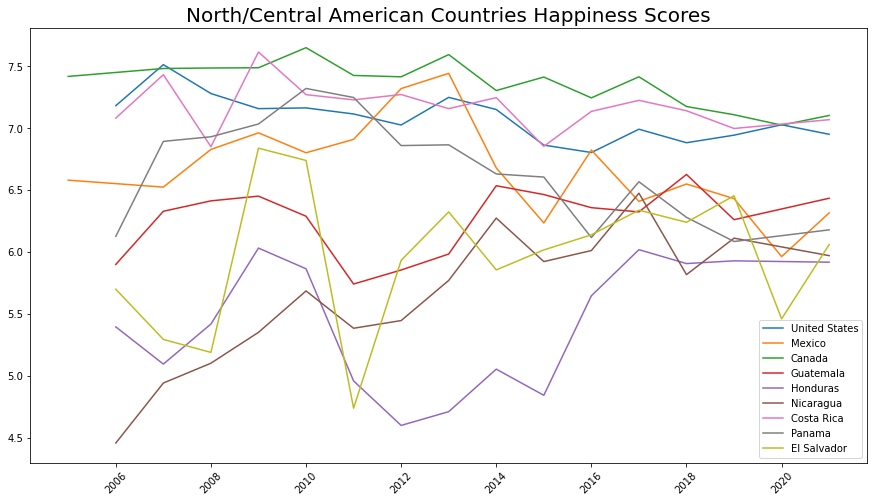

In [8]:
prep.plot_happy_N(HappyDf)
plt.title("North/Central American Countries Happiness Scores", fontsize=20);

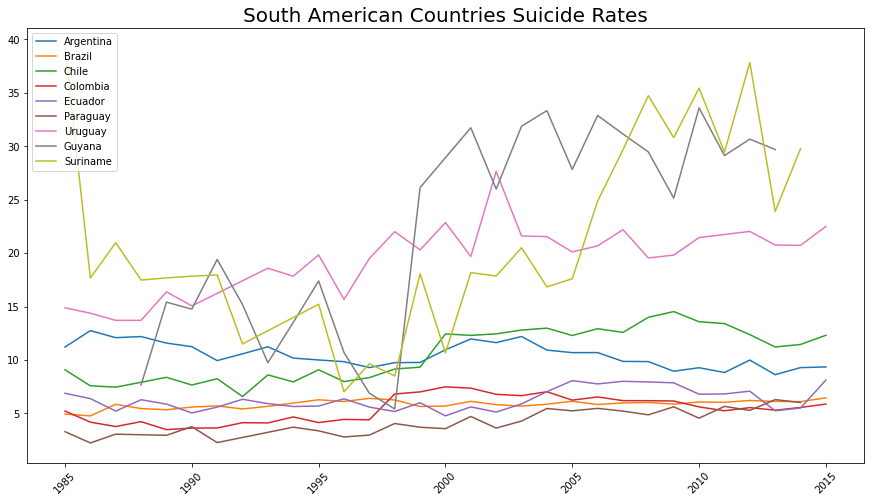

In [9]:
prep.plot_rate_S(RateDf)
plt.title('South American Countries Suicide Rates', fontsize=20);

* North/Central American Countries

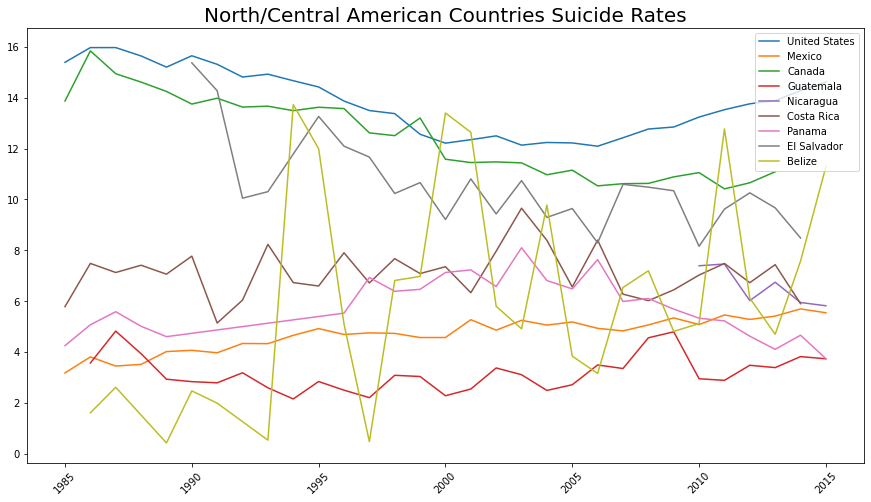

In [10]:
prep.plot_rate_N(RateDf)
plt.title("North/Central American Countries Suicide Rates", fontsize=20);

### EDA by Country

#### Argentina

Life Expectancy at Birth Average: 67.96875
Happiness Score Average (0-10): 6.2863125
Suicide Rate Average Per 100K: 10.469327956989249
Log GDP Per Capita Average: 8.869176718988571
Log GNI Per Capita Average: 8.753994164816284
Inflation Annual % Average: nan
Foreign Investment % of GDP: 1.9983505117459952
-------------------------------------------
Perceptions of corruption: 0.8415625
Freedom to make life choices: 0.7719374999999999
Generosity: -0.16125
Social Support: 0.904
Rural Pop Growth % Average: -0.6996820271479021
Urban Pop Growth % Average: 1.4322652014742763
Social Safety Net Programs Adequacy Average: 11.350271477985363
Access to Electricity): 95.98954890238585
Access to Basic Water Services: 99.33503879322299


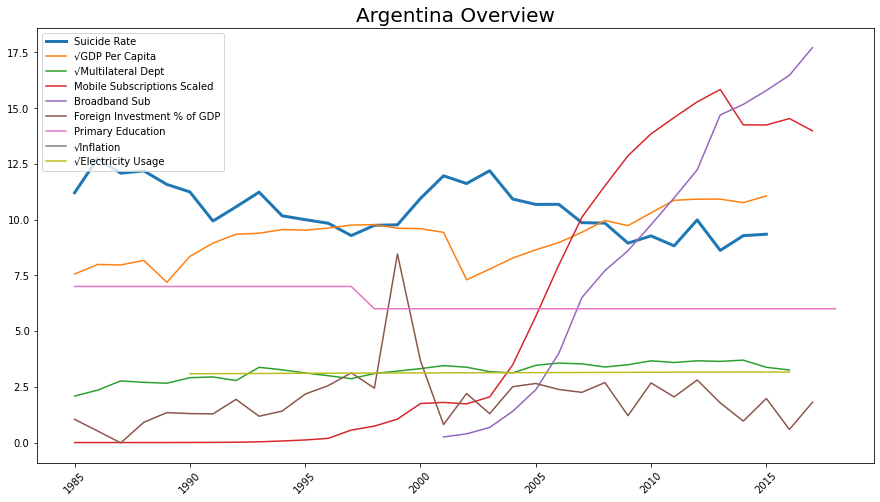

In [11]:
Argentina = prep.get_country_overview('Argentina', RateDf, HappyDf, WorldDf)

#### Brazil

Life Expectancy at Birth Average: 65.30381249999999
Happiness Score Average (0-10): 6.6026875
Suicide Rate Average Per 100K: 5.846021505376345
Log GDP Per Capita Average: 8.544124941744744
Log GNI Per Capita Average: 8.43259557809148
Inflation Annual % Average: 339.80419058162994
Foreign Investment % of GDP: 2.2815818319314016
-------------------------------------------
Perceptions of corruption: 0.7248749999999999
Freedom to make life choices: 0.796125
Generosity: -0.080625
Social Support: 0.893625
Rural Pop Growth % Average: -1.0971595764834976
Urban Pop Growth % Average: 2.0561990727212778
Social Safety Net Programs Adequacy Average: 11.024068277526066
Access to Electricity): 95.63909655296948
Access to Basic Water Services: 95.63353076051162


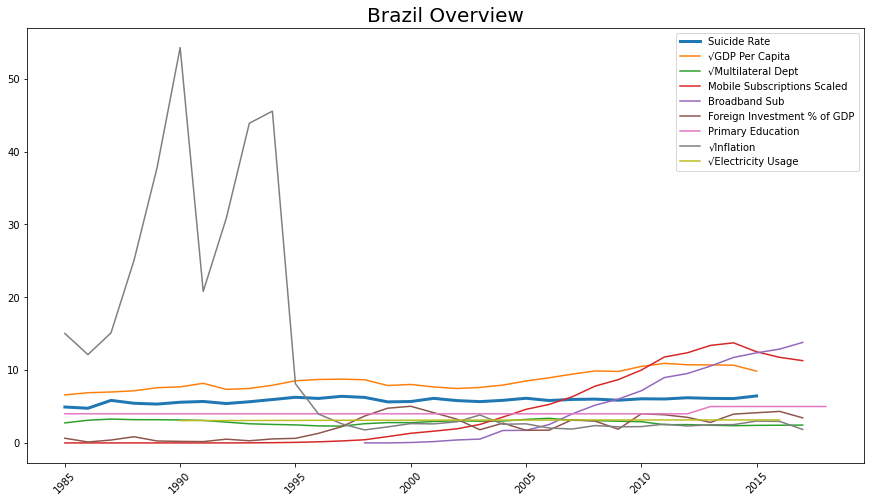

In [12]:
Brazil = prep.get_country_overview('Brazil', RateDf, HappyDf, WorldDf)

#### Chile

Life Expectancy at Birth Average: 69.375
Happiness Score Average (0-10): 6.3451249999999995
Suicide Rate Average Per 100K: 10.542043010752689
Log GDP Per Capita Average: 8.699269302980728
Log GNI Per Capita Average: 8.598853844519363
Inflation Annual % Average: 8.413257195597554
Foreign Investment % of GDP: 5.661491764009309
-------------------------------------------
Perceptions of corruption: 0.7745
Freedom to make life choices: 0.729125
Generosity: 0.0819375
Social Support: 0.8511875
Rural Pop Growth % Average: 0.22293035841289296
Urban Pop Growth % Average: 1.4197572921942174
Social Safety Net Programs Adequacy Average: 6.649573959205307
Access to Electricity): 97.58108945703125
Access to Basic Water Services: 98.02804517511191


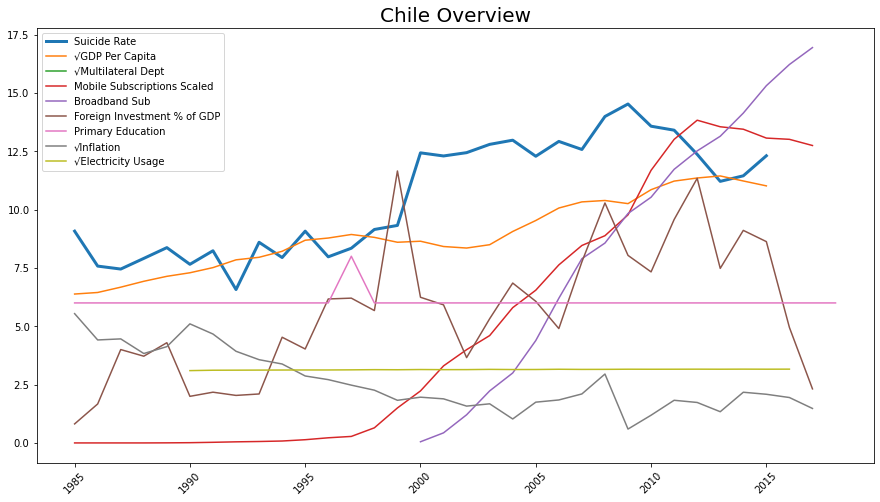

In [13]:
Chile = prep.get_country_overview('Chile', RateDf, HappyDf, WorldDf)

#### Colombia

Life Expectancy at Birth Average: 66.6000625
Happiness Score Average (0-10): 6.23375
Suicide Rate Average Per 100K: 5.401586021505377
Log GDP Per Capita Average: 8.022037894913149
Log GNI Per Capita Average: 7.933450780365535
Inflation Annual % Average: 13.179117562289779
Foreign Investment % of GDP: 2.9037284453804735
-------------------------------------------
Perceptions of corruption: 0.8473124999999999
Freedom to make life choices: 0.8158749999999999
Generosity: -0.083875
Social Support: 0.884875
Rural Pop Growth % Average: -0.18598149170360395
Urban Pop Growth % Average: 2.037709149694142
Social Safety Net Programs Adequacy Average: 5.32815882674435
Access to Electricity): 94.6965722600369
Access to Basic Water Services: 93.4387253582087


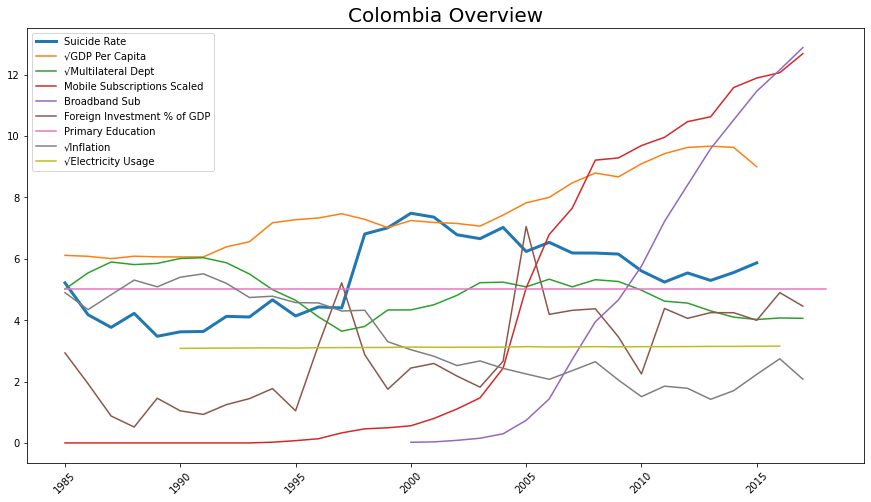

In [14]:
Colombia = prep.get_country_overview('Colombia', RateDf, HappyDf, WorldDf)

#### Ecuador

Life Expectancy at Birth Average: 67.49374999999999
Happiness Score Average (0-10): 5.742
Suicide Rate Average Per 100K: 6.304327956989248
Log GDP Per Capita Average: 7.973898639890484
Log GNI Per Capita Average: 7.853834646188657
Inflation Annual % Average: 24.507745254869953
Foreign Investment % of GDP: 1.356785727199576
-------------------------------------------
Perceptions of corruption: 0.7745625
Freedom to make life choices: 0.7785000000000001
Generosity: -0.1129375
Social Support: 0.828875
Rural Pop Growth % Average: 0.9783986046622924
Urban Pop Growth % Average: 2.625516675053882
Social Safety Net Programs Adequacy Average: 11.3199652852397
Access to Electricity): 94.45105608693214
Access to Basic Water Services: 87.88646086163638


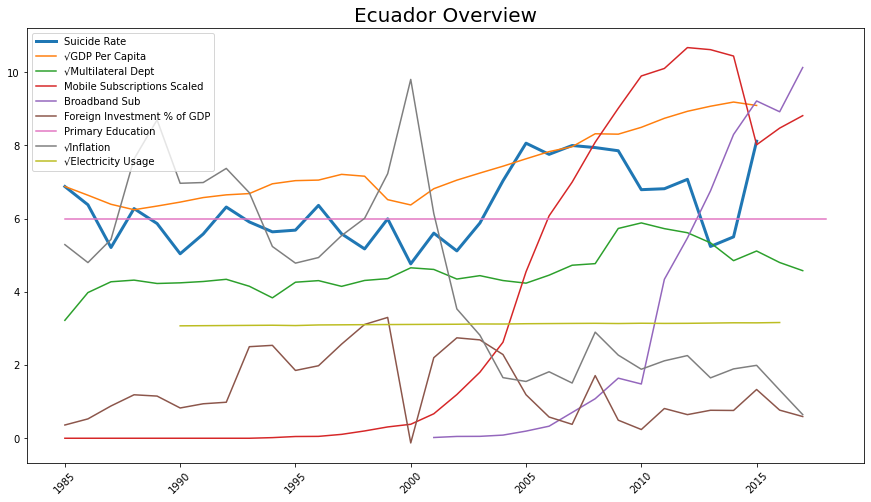

In [15]:
Ecuador = prep.get_country_overview('Ecuador', RateDf, HappyDf, WorldDf)

#### Guyana

Life Expectancy at Birth Average: 57.26
Happiness Score Average (0-10): 5.9929999999999986
Suicide Rate Average Per 100K: 22.186400000000003
Log GDP Per Capita Average: 7.1856259704800065
Log GNI Per Capita Average: 7.027378756884167
Inflation Annual % Average: 4.878480428788435
Foreign Investment % of GDP: 7.457842926784485
-------------------------------------------
Perceptions of corruption: 0.836
Freedom to make life choices: 0.6940000000000001
Generosity: 0.11
Social Support: 0.8490000000000001
Rural Pop Growth % Average: 0.16195808122676314
Urban Pop Growth % Average: -0.37377581452871006
Social Safety Net Programs Adequacy Average: nan
Access to Electricity): 76.22949086912439
Access to Basic Water Services: 91.5331250892575


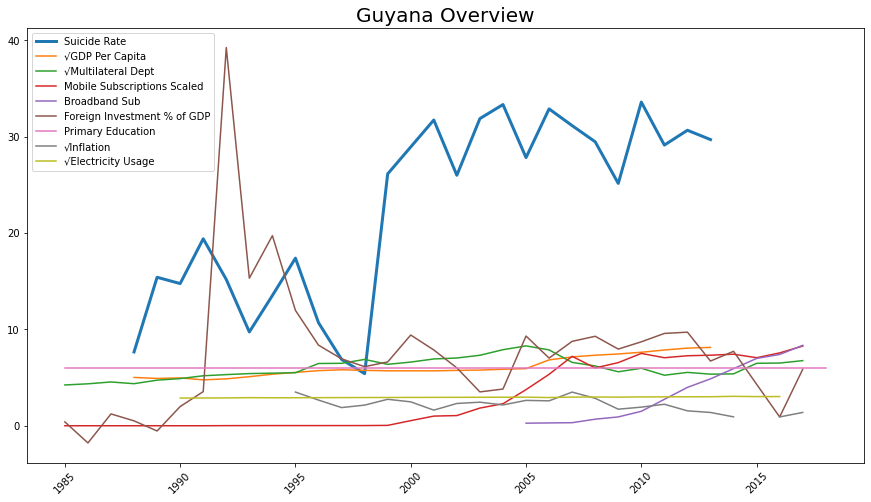

In [16]:
Guyana = prep.get_country_overview('Guyana', RateDf, HappyDf, WorldDf)

#### Suriname

Life Expectancy at Birth Average: 62.24
Happiness Score Average (0-10): 6.269
Suicide Rate Average Per 100K: 21.31642857142857
Log GDP Per Capita Average: 8.125666613257696
Log GNI Per Capita Average: 7.997339894739712
Inflation Annual % Average: 41.275728406537084
Foreign Investment % of GDP: -5.335820786842539
-------------------------------------------
Perceptions of corruption: 0.7509999999999999
Freedom to make life choices: 0.885
Generosity: -0.077
Social Support: 0.797
Rural Pop Growth % Average: 1.2244483253972562
Urban Pop Growth % Average: 1.3295356135631797
Social Safety Net Programs Adequacy Average: nan
Access to Electricity): 94.8504330798806
Access to Basic Water Services: 92.33743150364587


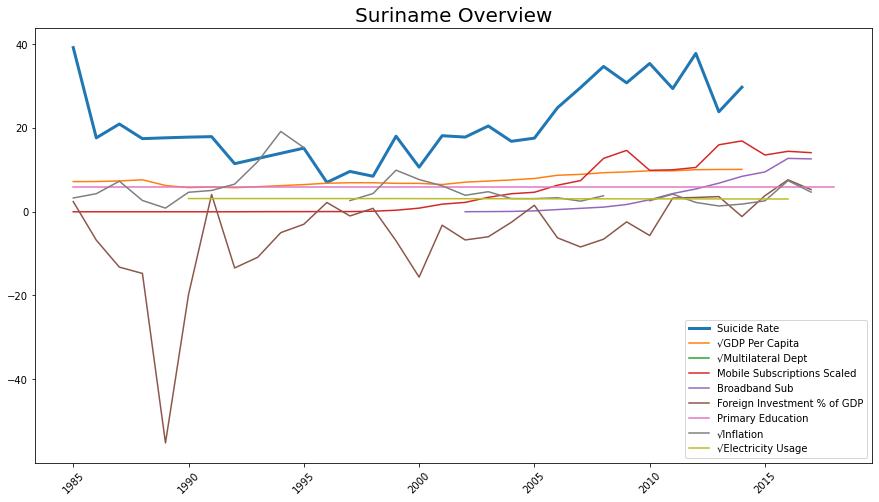

In [17]:
Suriname = prep.get_country_overview('Suriname', RateDf, HappyDf, WorldDf)

#### Paraguay

Life Expectancy at Birth Average: 64.8
Happiness Score Average (0-10): 5.565785714285716
Suicide Rate Average Per 100K: 4.217191358024691
Log GDP Per Capita Average: 7.657424096083206
Log GNI Per Capita Average: 7.848584448141161
Inflation Annual % Average: 12.40665451409895
Foreign Investment % of GDP: 1.1047760840886482
-------------------------------------------
Perceptions of corruption: 0.8347857142857142
Freedom to make life choices: 0.7762857142857144
Generosity: 0.05521428571428572
Social Support: 0.9053571428571427
Rural Pop Growth % Average: 0.853197393783093
Urban Pop Growth % Average: 2.947391671292183
Social Safety Net Programs Adequacy Average: 13.799886355329575
Access to Electricity): 91.29136785675276
Access to Basic Water Services: 87.32253150702837


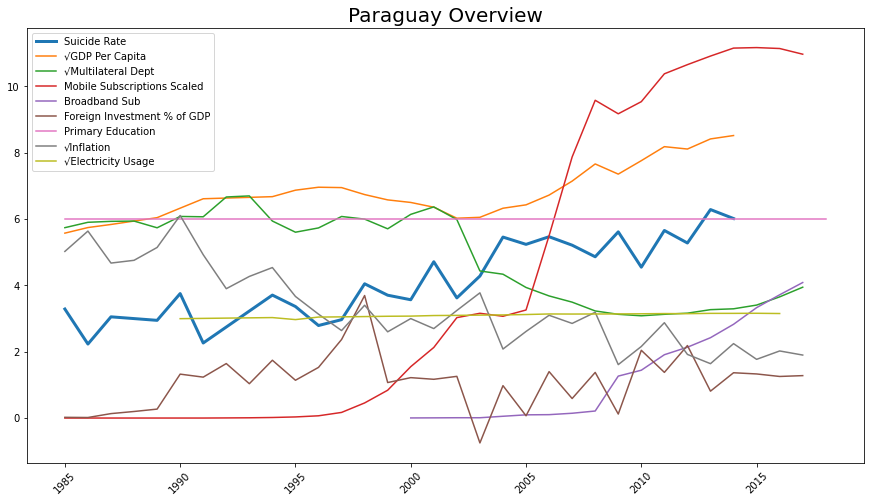

In [18]:
Paraguay = prep.get_country_overview('Paraguay', RateDf, HappyDf, WorldDf)

#### Uruguay

Life Expectancy at Birth Average: 68.425
Happiness Score Average (0-10): 6.2724375000000006
Suicide Rate Average Per 100K: 19.461190476190474
Log GDP Per Capita Average: 8.75115240911807
Log GNI Per Capita Average: 8.684288881636123
Inflation Annual % Average: 30.125188499224397
Foreign Investment % of GDP: 2.471348536802808
-------------------------------------------
Perceptions of corruption: 0.58325
Freedom to make life choices: 0.8659999999999999
Generosity: -0.08681250000000001
Social Support: 0.9036875
Rural Pop Growth % Average: -2.6424398419373847
Urban Pop Growth % Average: 0.7163300600395083
Social Safety Net Programs Adequacy Average: 7.770685163521169
Access to Electricity): 98.22936330919053
Access to Basic Water Services: 97.88110259065998


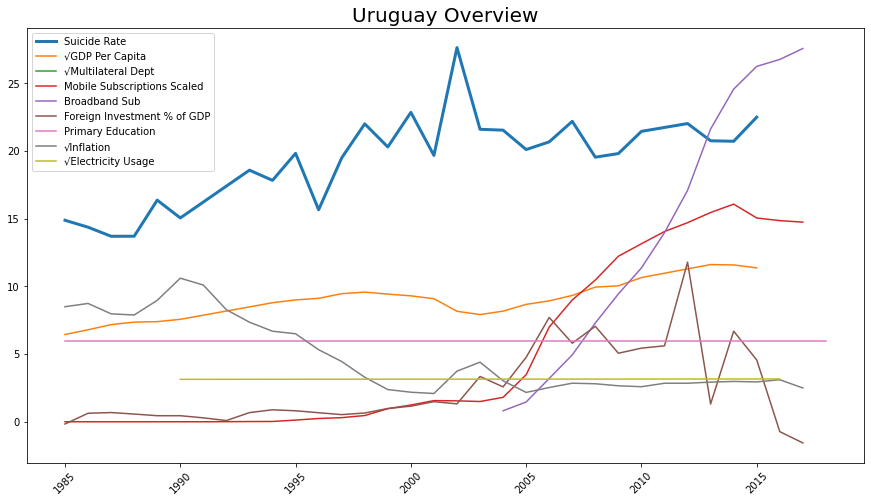

In [19]:
Uruguay = prep.get_country_overview('Uruguay', RateDf, HappyDf, WorldDf)

#### United States
* For reference

Life Expectancy at Birth Average: 68.425
Happiness Score Average (0-10): 7.0815
Suicide Rate Average Per 100K: 13.819811827956988
Log GDP Per Capita Average: 10.524795596512899
Log GNI Per Capita Average: 10.49148778710336
Inflation Annual % Average: 2.6425262238698126
Foreign Investment % of GDP: 1.4811402483937215
-------------------------------------------
Perceptions of corruption: 0.6889375
Freedom to make life choices: 0.8429375
Generosity: 0.1825
Social Support: 0.9229375000000001
Rural Pop Growth % Average: -0.11044055030066484
Urban Pop Growth % Average: 1.2724578821291566
Social Safety Net Programs Adequacy Average: nan
Access to Electricity): 100.0
Access to Basic Water Services: 99.1743177137401


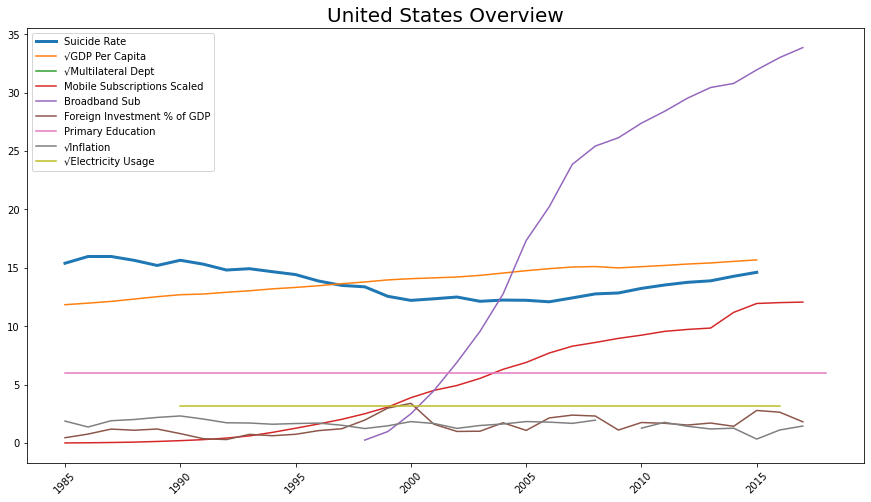

In [20]:
USA = prep.get_country_overview('United States', RateDf, HappyDf, WorldDf)

# Modeling

See what features correlate most with suicide rates

In [21]:
World_Overview = prep.get_world_overview(RateDf, HappyDf, WorldDf)

Life Expectancy at Birth Average: 62.855488107316795
Happiness Score Average (0-10): 5.43152168367347
Suicide Rate Average Per 100K: 11.51421875
Log GDP Per Capita Average: 9.620263626763
Log GNI Per Capita Average: 8.487279977306615
Inflation Annual % Average: 5.31226206771533
Foreign Investment % of GDP: 5.9855480262759935
-------------------------------------------
Perceptions of corruption: 0.7492286267144845
Freedom to make life choices: 0.7298852040816327
Generosity: 0.004366523171768704
Social Support: 0.8109151785714285
Rural Pop Growth % Average: 0.4184128587661824
Urban Pop Growth % Average: 2.109200376375242
Social Safety Net Programs Adequacy Average: 10.014306870986822
Access to Electricity: 79.79457617500604
Access to Basic Water Services: 85.27919395128757


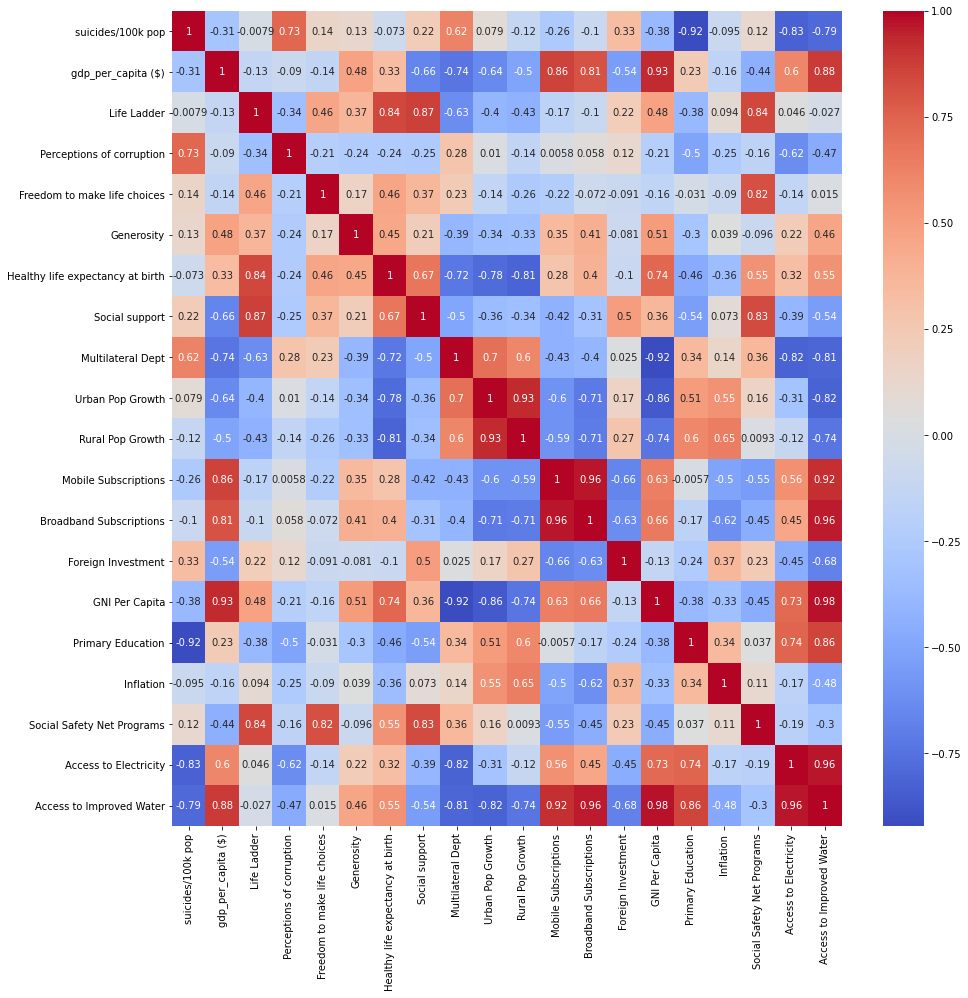

In [22]:
plt.subplots(figsize=(15,15))
sns.heatmap(World_Overview.groupby('year').mean().corr(), annot = True, cmap = 'coolwarm');

In [23]:
South_A_Overview = pd.concat((Argentina, Brazil, Chile, Colombia, Ecuador, Guyana, Uruguay, Paraguay, Suriname)).interpolate().dropna()

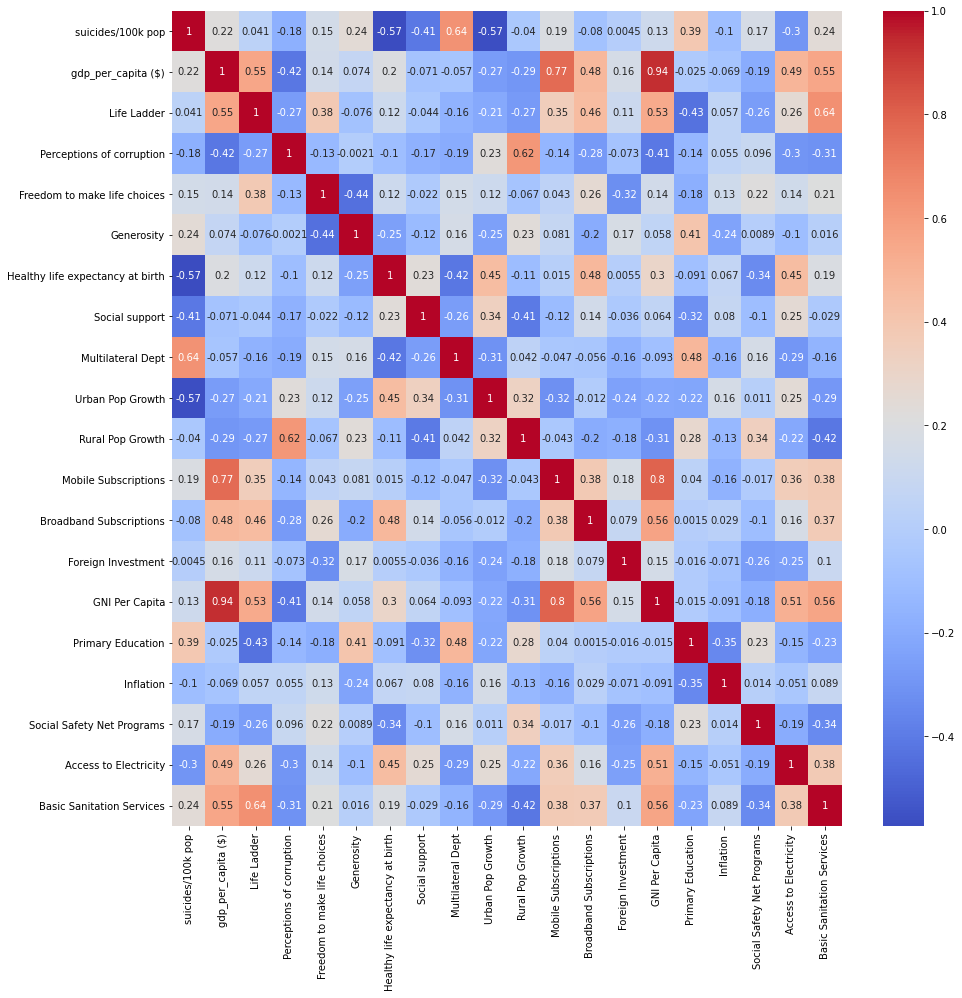

In [24]:
plt.subplots(figsize=(15,15))
sns.heatmap(South_A_Overview.corr(), annot = True, cmap = 'coolwarm');

In [25]:
rate = RateDf.groupby(['Country', 'year']).mean().drop(columns=['HDI for year'])
Cat_RateDf = RateDf.set_index(['Country', 'year'])[['sex', 'age', 'generation']]
Cat_RateDf = pd.get_dummies(Cat_RateDf)

In [26]:
new_rate = Cat_RateDf.merge(rate, on=['Country', 'year'])

In [27]:
y = new_rate["suicides/100k pop"]

X = new_rate.drop("suicides/100k pop", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

X_train_scaled = (X_train - np.mean(X_train)) / np.std(X_train)
X_int = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     378.2
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:49:32   Log-Likelihood:                -74313.
No. Observations:               20865   AIC:                         1.487e+05
Df Residuals:                   20847   BIC:                         1.488e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.8171      0.059    216.240      0.000      12.701      12.933
sex_female                 -2.175e+12   8.59e+11     -2.533      0.011   -3.86e+12   -4.92e+11
sex_male                   -2.175e+12   8.59e+11     -2.533      0.011   -3.86e+12   -4.92e+11
age_15-24 years             2.275e+12    9.9e+11      2.298      0.022    3.35e+11    4.22e+12
age_25-34 years             2.285e+12   9.94e+11      2.298      0.022    3.36e+11    4.23e+12
age_35-54 years              2.29e+12   9.97e+11      2.298      0.022    3.37e+11    4.24e+12
age_5-14 years              2.275e+12    9.9e+11      2.298      0.022    3.35e+11    4.22e+12
age_55-74 years             2.293e+12   9.98e+11      2.298      0.022    3.37e+11    4.25e+12
age_75+ years               2.269e+12   9.87e+11      2.298      0.022    3.34e+11     4.2e+12
generation_Boomers          8.061e+10    6.7e+11      0.120      0.904   -1.23e+12    1.39e+12
generation_G.I. Generation  6.222e+10   5.17e+11      0.120      0.904   -9.52e+11    1.08e+12
generation_Generation X     8.851e+10   7.36e+11      0.120      0.904   -1.35e+12    1.53e+12
generation_Generation Z     4.726e+10   3.93e+11      0.120      0.904   -7.23e+11    8.17e+11
generation_Millenials       8.578e+10   7.13e+11      0.120      0.904   -1.31e+12    1.48e+12
generation_Silent           8.868e+10   7.37e+11      0.120      0.904   -1.36e+12    1.53e+12
suicides_no                    7.9447      0.101     78.561      0.000       7.746       8.143
population                    -5.7219      0.101    -56.622      0.000      -5.920      -5.524
gdp_per_capita ($)            -0.0466      0.062     -0.751      0.453      -0.168       0.075
==============================================================================
Omnibus:                     3024.640   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4931.226
Skew:                           0.991   Prob(JB):                         0.00
Kurtosis:                       4.319   Cond. No.                     6.72e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
hap = HappyDf.groupby(['Country', 'year']).mean().drop(columns='Unnamed: 0')

In [29]:
y = hap["Life Ladder"]

X = hap.drop("Life Ladder", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

X_train_scaled = (X_train - np.mean(X_train)) / np.std(X_train)
X_int = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     727.5
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:49:32   Log-Likelihood:                -1352.7
No. Observations:                1573   AIC:                             2719.
Df Residuals:                    1566   BIC:                             2757.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                5.4781      0.014    379.135      0.000       5.450       5.506
Log GDP per capita                   0.3818      0.029     13.139      0.000       0.325       0.439
Social support                       0.2737      0.021     13.197      0.000       0.233       0.314
Healthy life expectancy at birth     0.2438      0.026      9.250      0.000       0.192       0.296
Freedom to make life choices         0.1530      0.018      8.449      0.000       0.117       0.189
Generosity                           0.1103      0.016      7.071      0.000       0.080       0.141
Perceptions of corruption           -0.1095      0.018     -6.252      0.000      -0.144      -0.075
==============================================================================
Omnibus:                       18.282   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.407
Skew:                          -0.159   Prob(JB):                     8.26e-06
Kurtosis:                       3.506   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### South America features testing

In [30]:
y = South_A_Overview["Life Ladder"]

X = South_A_Overview.drop(columns=["Life Ladder", "suicides/100k pop"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

In [31]:
X_train_scaled = (X_train - np.mean(X_train)) / np.std(X_train)
X_int = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     40.54
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           2.74e-56
Time:                        01:49:32   Log-Likelihood:                 80.845
No. Observations:                 216   AIC:                            -123.7
Df Residuals:                     197   BIC:                            -59.56
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                6.0034      0.012    506.309      0.000       5.980       6.027
gdp_per_capita ($)                  -0.0070      0.041     -0.170      0.865      -0.088       0.074
Perceptions of corruption           -0.0747      0.020     -3.827      0.000      -0.113      -0.036
Freedom to make life choices         0.1238      0.017      7.284      0.000       0.090       0.157
Generosity                           0.0649      0.018      3.685      0.000       0.030       0.100
Healthy life expectancy at birth    -0.0829      0.023     -3.610      0.000      -0.128      -0.038
Social support                      -0.0382      0.019     -2.035      0.043      -0.075      -0.001
Multilateral Dept                   -0.0301      0.019     -1.592      0.113      -0.067       0.007
Urban Pop Growth                    -0.0885      0.023     -3.842      0.000      -0.134      -0.043
Rural Pop Growth                     0.1066      0.026      4.151      0.000       0.056       0.157
Mobile Subscriptions                -0.0848      0.026     -3.299      0.001      -0.136      -0.034
Broadband Subscriptions              0.1309      0.020      6.581      0.000       0.092       0.170
Foreign Investment                   0.0289      0.016      1.843      0.067      -0.002       0.060
GNI Per Capita                       0.1001      0.047      2.114      0.036       0.007       0.194
Primary Education                   -0.1990      0.020    -10.134      0.000      -0.238      -0.160
Inflation                           -0.0195      0.014     -1.445      0.150      -0.046       0.007
Social Safety Net Programs          -0.0465      0.016     -2.842      0.005      -0.079      -0.014
Access to Electricity                0.0486      0.024      2.063      0.040       0.002       0.095
Basic Sanitation Services            0.0581      0.019      2.981      0.003       0.020       0.096
==============================================================================
Omnibus:                       13.951   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.896
Skew:                          -0.493   Prob(JB):                     0.000214
Kurtosis:                       3.952   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Significat happy features are, Corruption(Negative), Freedom(Positve), Generosity(Positive), UrbanPop(Negative), RuralPop(Positive), Broadband(Positive), Education(Negative), Access to Electricy(Positive) 

In [32]:
y = South_A_Overview["suicides/100k pop"]

X = South_A_Overview.drop(columns=["Life Ladder", "suicides/100k pop"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=789)

In [33]:
X_train_scaled = (X_train - np.mean(X_train)) / np.std(X_train)
X_int = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     56.59
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.11e-67
Time:                        01:49:32   Log-Likelihood:                -580.51
No. Observations:                 216   AIC:                             1199.
Df Residuals:                     197   BIC:                             1263.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               12.6448      0.253     49.912      0.000      12.145      13.144
gdp_per_capita ($)                   4.2325      0.882      4.800      0.000       2.494       5.971
Perceptions of corruption            0.5316      0.417      1.274      0.204      -0.291       1.354
Freedom to make life choices         0.8243      0.363      2.269      0.024       0.108       1.541
Generosity                          -0.7159      0.376     -1.902      0.059      -1.458       0.026
Healthy life expectancy at birth    -3.4941      0.490     -7.126      0.000      -4.461      -2.527
Social support                       0.0760      0.401      0.189      0.850      -0.716       0.868
Multilateral Dept                    2.5077      0.403      6.216      0.000       1.712       3.303
Urban Pop Growth                    -0.1536      0.492     -0.312      0.755      -1.124       0.817
Rural Pop Growth                    -0.0764      0.549     -0.139      0.889      -1.158       1.005
Mobile Subscriptions                -0.4058      0.549     -0.739      0.461      -1.489       0.678
Broadband Subscriptions             -1.3811      0.425     -3.251      0.001      -2.219      -0.543
Foreign Investment                  -0.2487      0.336     -0.741      0.460      -0.910       0.413
GNI Per Capita                      -1.0181      1.012     -1.006      0.316      -3.014       0.978
Primary Education                    2.9748      0.420      7.089      0.000       2.147       3.802
Inflation                            0.1609      0.289      0.557      0.578      -0.408       0.730
Social Safety Net Programs           0.1890      0.349      0.541      0.589      -0.500       0.878
Access to Electricity               -2.7123      0.503     -5.392      0.000      -3.704      -1.720
Basic Sanitation Services            3.5617      0.416      8.557      0.000       2.741       4.383
==============================================================================
Omnibus:                       30.276   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.862
Skew:                           0.247   Prob(JB):                     2.15e-37
Kurtosis:                       7.303   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Significant Suicide rate features are, GDP Per capita(Positive), Debt(Positive), Broadband(Negative), Education(Positive), Access to Electricity(Negative), Sanitation(Positive). The sanitation feature seems out of place but if we look at the world correlation heatmap we can see that sanitation has a strong negative correlation. Oddly enough we find primary education to be significant on both summaries showing a negative relationship with happiness and positive for suicide. Others make complete sense such as debt having a positive relationship and access to electricity having a negative relationship to suicides. 

Our primary features that are most significant are, Access to Electricity, Access to Basic Sanitation, Life Ladder(Happiness Score), gdp_per_capita ($), Freedom to make life choices, Multilateral Dept, and Education

In [34]:
RateDf['year'] = pd.to_datetime(RateDf['year'].astype(str))
RateDf = RateDf.groupby(['Country','year']).mean()
HappyDf['year'] = pd.to_datetime(HappyDf['year'].astype(str))
HappyDf = HappyDf.groupby(['Country', 'year']).mean()

In [35]:
ts_rate = RateDf['suicides/100k pop'].groupby('year').mean()

In [36]:
naive = ts_rate.shift(1)

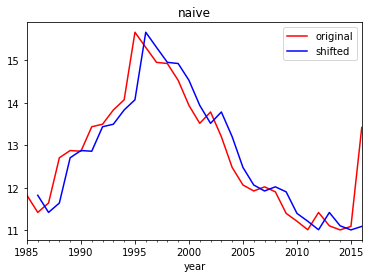

In [37]:
fig, ax = plt.subplots()

ts_rate.plot(ax=ax, c='r', label='original')
naive.plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

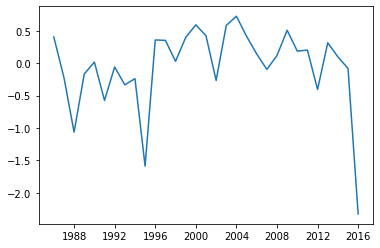

In [38]:
fig, ax = plt.subplots()
residuals = naive[1:] - ts_rate[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(1).std());

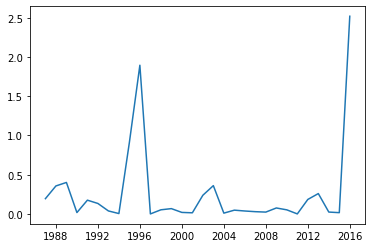

In [39]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(2).var());

In [40]:
p_val = adfuller(ts_rate.diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.022756663612096186,
 so we can safely assume that the differenced data is stationary.


In [41]:
ar_1 = ARIMA(ts_rate, order=(0, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar_1.predict(typ='levels')
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      suicides/100k pop   No. Observations:                   32
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -29.926
Date:                Mon, 29 Nov 2021   AIC                             61.853
Time:                        01:49:33   BIC                             63.287
Sample:                    01-01-1985   HQIC                            62.320
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4037      0.057      7.098      0.000       0.292       0.515
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                38.66
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             1.90
Prob(H) (two-sided):                  0.63   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [43]:
#ts_rate = ts_rate.resample('M').mean().interpolate()

In [44]:
suicide_rates = ts_rate.asfreq(pd.infer_freq(ts_rate.index))

In [45]:
start_date = datetime(1985,1,1)
end_date = datetime(2016,1,1)
lim_suicide_rates = suicide_rates[start_date:end_date]

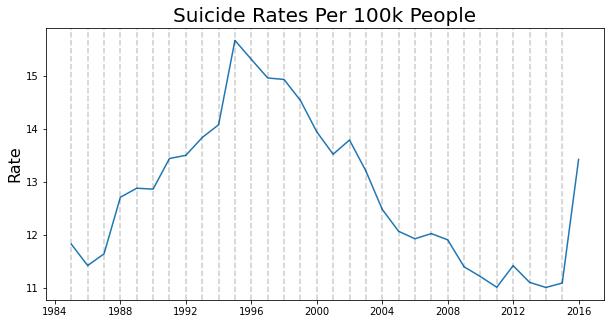

In [46]:
plt.figure(figsize=(10,5))
plt.plot(lim_suicide_rates)
plt.title('Suicide Rates Per 100k People', fontsize=20)
plt.ylabel('Rate', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [47]:
first_diff = lim_suicide_rates.diff()[1:]

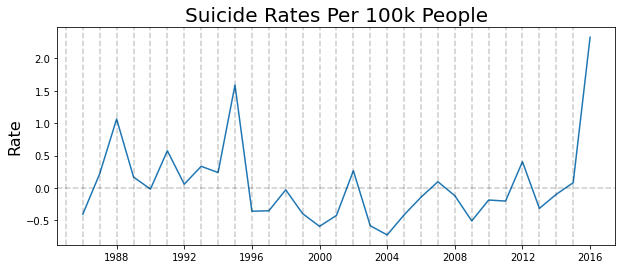

In [48]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Suicide Rates Per 100k People', fontsize=20)
plt.ylabel('Rate', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

### ACF

<BarContainer object of 25 artists>

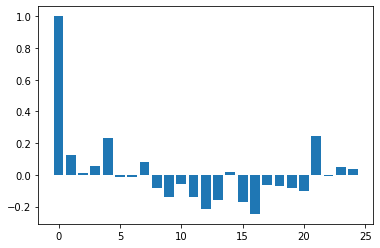

In [49]:
acf_vals = acf(first_diff)
num_lags = 25
plt.bar(range(num_lags), acf_vals[:num_lags])

### PACF

In [50]:
#plot_pacf(first_diff)

In [51]:
train_end = datetime(2011,1,1)
test_end = datetime(2016,1,31)

train_data = lim_suicide_rates[:train_end]
test_data = lim_suicide_rates[train_end + timedelta(days=1):test_end]

In [52]:
order = (0,1,0)
seasonal_order = (0, 0, 1, 4)

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)

In [53]:
start = time()
model_fit = model.fit()
end = time()
print("Fitting Time:", end - start)

Fitting Time: 0.04340624809265137


In [54]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                   suicides/100k pop   No. Observations:                   27
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 4)   Log Likelihood                 -17.981
Date:                             Mon, 29 Nov 2021   AIC                             39.963
Time:                                     01:49:34   BIC                             42.479
Sample:                                 01-01-1985   HQIC                            40.687
                                      - 01-01-2011                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L4        0.4355      0.162      2.696      0.007       0.119       0.752
sigma2         0.2260      

In [55]:
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

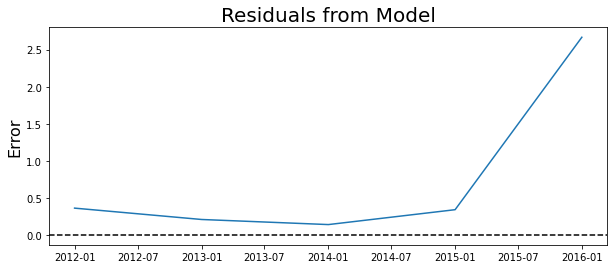

In [56]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

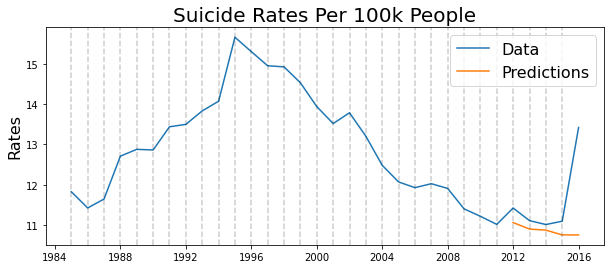

In [57]:
plt.figure(figsize=(10,4))

plt.plot(lim_suicide_rates)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Suicide Rates Per 100k People', fontsize=20)
plt.ylabel('Rates', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [58]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0585


In [59]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.2186129551153442


In [60]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_suicide_rates[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    
    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

In [61]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

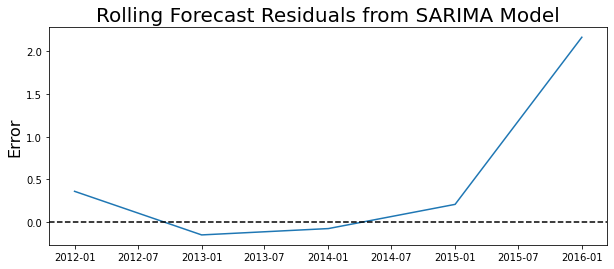

In [62]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

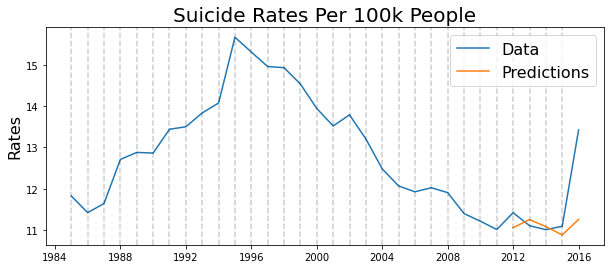

In [63]:
plt.figure(figsize=(10,4))
plt.plot(lim_suicide_rates)
plt.plot(rolling_predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Suicide Rates Per 100k People', fontsize=20)
plt.ylabel('Rates', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [64]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0463


In [65]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 0.9876151545609113


In [66]:
ts_happy = HappyDf['Life Ladder'].groupby('year').mean()

In [67]:
happy_score = ts_happy.asfreq(pd.infer_freq(ts_rate.index))

In [68]:
start_date = datetime(2005,1,1)
end_date = datetime(2021,1,1)
lim_happy_scores = happy_score[start_date:end_date]

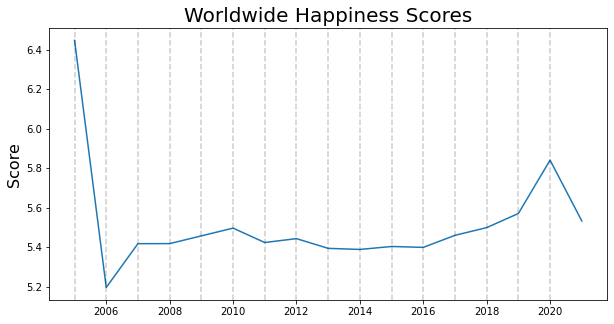

In [69]:
plt.figure(figsize=(10,5))
plt.plot(lim_happy_scores)
plt.title('Worldwide Happiness Scores', fontsize=20)
plt.ylabel('Score', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [70]:
HappyDf['Life Ladder'].min()

2.375